In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats

In [2]:
data = pd.read_csv("20_1.txt", sep=" ")
data.head()

,lp,T,U
0,1,18.7,0.940
1,2,20.0,1.011
2,3,22.0,1.097
3,4,24.0,1.186
4,5,26.2,1.318


In [3]:
def calculate_uB_T(x,DeltaT=1.0):
    return DeltaT/math.sqrt(3)

def calculate_uB_U(x,U_scale=100.0):
    return (x*0.05/100 +  U_scale* 0.01/100)/math.sqrt(3)

data.insert(2,"uT",calculate_uB_T(data['T']))
data.insert(4,"uU",calculate_uB_U(data['U']))

data.head()

,lp,T,uT,U,uU
0,1,18.7,0.57735,0.940,0.006045
1,2,20.0,0.57735,1.011,0.006065
2,3,22.0,0.57735,1.097,0.006090
3,4,24.0,0.57735,1.186,0.006116
4,5,26.2,0.57735,1.318,0.006154


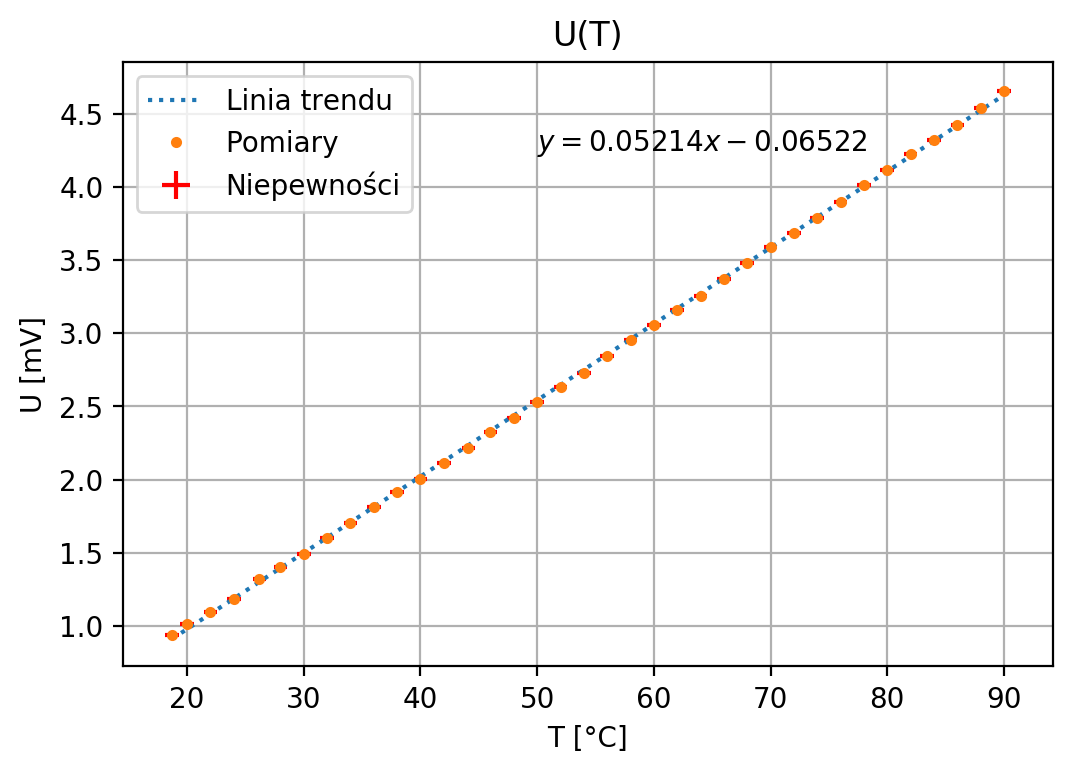

In [4]:
plt.rcParams['figure.dpi'] = 200
x=data['T']
y=data['U']
xerr=data['uT']
yerr=data['uU']
alpha,b,temp,temp,ualpha=stats.linregress(x,y)

plt.plot(x,alpha*x+b,':',label='Linia trendu')
plt.text(50, 4.25, '$y={:.5f}x{:.5f}$'.format(alpha,b))
plt.plot(x,y,'.',label="Pomiary")
plt.xlabel('T [°C]')
plt.ylabel('U [mV]')
plt.errorbar(x=x, y=y, xerr=xerr, yerr=yerr,fmt='none',color='red',label="Niepewności")
plt.grid(which='both',axis='both')
plt.legend()
plt.title("U(T)")
plt.savefig("U_Temperature.png",dpi=600)
plt.show()

In [5]:
data2 = pd.read_csv("20_2.txt", sep=" ")
data2.head()

,lp,t,U
0,1,0.0,4.987
1,2,0.5,4.732
2,3,1.0,4.513
3,4,1.5,4.342
4,5,2.0,4.212


In [6]:
def calculate_u_U(x,U_scale=100.0):
    return (x*0.05/100 +  U_scale* 0.01/100)/math.sqrt(3)
data2.insert(3,'uU',calculate_u_U(data2['U']))

data2.head()

,lp,t,U,uU
0,1,0.0,4.987,0.007213
1,2,0.5,4.732,0.007140
2,3,1.0,4.513,0.007076
3,4,1.5,4.342,0.007027
4,5,2.0,4.212,0.006989


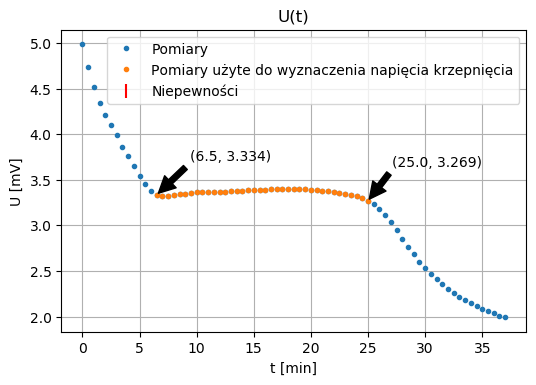

In [7]:
plt.rcParams['figure.dpi'] = 100
x=data2['t']
y=data2['U']

yerr=data2['uU']

plt.plot(x,y,'.',label="Pomiary")

plt.xlabel('t [min]')
plt.ylabel('U [mV]')
plt.errorbar(x=x, y=y, xerr=None, yerr=yerr, fmt='none', color='red', label="Niepewności")

start=13
plt.annotate('('+str(x[start])+ ", "+str(y[start])+')', xy=(x[start], y[start]),
            xytext=(x[start]+10, y[start]+0.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

stop=50
plt.annotate('('+str(x[stop])+ ", "+str(y[stop])+')', xy=(x[stop], y[stop]),
            xytext=(x[stop]+10, y[stop]+0.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.plot(x[start:stop+1],y[start:stop+1],'.',label="Pomiary użyte do wyznaczenia napięcia krzepnięcia")


plt.grid(which='both',axis='both')
plt.legend()
plt.title("U(t)")
plt.savefig("U_time_.png",dpi=600)
plt.show()

In [8]:
def calculate_uA_U(Uk,dataUk):
    s=0
    for U in data2['U'][13:51]:
        s += (U-Uk)**2
    return math.sqrt(s / ((51-13)*(51-13-1)))

def calculate_u_U(Uk,dataUk):
    return math.sqrt(calculate_uA_U(Uk,dataUk)**2 + calculate_uB_U(Uk)**2)

dataUk = data2['U'][13:51]
Uk = dataUk.mean()
uUk = calculate_u_U(Uk,dataUk)

In [9]:
Tk = Uk/alpha
def calculate_uC_Tk(Uk,uUk,alpha,ualpha):
    return math.sqrt((1/alpha)**2 * uUk**2 + (-Uk/alpha**2)**2 * ualpha**2 )
uTk = calculate_uC_Tk(Uk,uUk,alpha,ualpha)
uTk

0.20936496985954062

In [10]:
print(str(Tk) + " " + str(uTk))

64.49240363839101 0.20936496985954062


In [11]:
def round_up(n, decimals=0): 
    multiplier = 10 ** decimals 
    return math.ceil(n * multiplier) / multiplier

def round_2significant(u, x=None):
    i = 0
    while (u <= 10):
        u *= 10
        i += 1
    while (100 < u):
        u *= 0.1
        i -= 1
    #now 10 <= u < 100
    ten_pow = 10 ** i
    u = math.ceil(u) / ten_pow
    if (x is not None):
        x = math.ceil(x * ten_pow) / ten_pow
    return u,x
        

wynik1 = data
wynik2 = data2

wynik1['uU'] = data['uU'].map(lambda x : round_up(x,4))
wynik1['uT'] = data['uT'].map(lambda x : round_up(x,2))
wynik2['uU'] = data2['uU'].map(lambda x : round_up(x,4))

In [12]:
print(wynik1.to_latex(index=False, longtable=True, bold_rows=True, caption="napisik", label="fig:first"))
print(wynik2.to_latex(index=False, longtable=True, bold_rows=True))

\begin{longtable}{rrrrr}
\caption{napisik}\label{fig:first}\\
\toprule
 lp &     T &    uT &      U &      uU \\
\midrule
\endhead
\midrule
\multicolumn{5}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
  1 &  18.7 &  0.58 &  0.940 &  0.0061 \\
  2 &  20.0 &  0.58 &  1.011 &  0.0061 \\
  3 &  22.0 &  0.58 &  1.097 &  0.0061 \\
  4 &  24.0 &  0.58 &  1.186 &  0.0062 \\
  5 &  26.2 &  0.58 &  1.318 &  0.0062 \\
  6 &  28.0 &  0.58 &  1.402 &  0.0062 \\
  7 &  30.0 &  0.58 &  1.494 &  0.0063 \\
  8 &  32.0 &  0.58 &  1.603 &  0.0063 \\
  9 &  34.0 &  0.58 &  1.704 &  0.0063 \\
 10 &  36.0 &  0.58 &  1.812 &  0.0063 \\
 11 &  38.0 &  0.58 &  1.918 &  0.0064 \\
 12 &  40.0 &  0.58 &  2.001 &  0.0064 \\
 13 &  42.0 &  0.58 &  2.114 &  0.0064 \\
 14 &  44.1 &  0.58 &  2.213 &  0.0065 \\
 15 &  46.0 &  0.58 &  2.323 &  0.0065 \\
 16 &  48.0 &  0.58 &  2.421 &  0.0065 \\
 17 &  50.0 &  0.58 &  2.530 &  0.0066 \\
 18 &  52.0 &  0.58 &  2.629 &  0.0066 \\
 19 &  54.0 

In [13]:
print(alpha)
print(ualpha)
print(ualpha/alpha * 100)

0.052143227970205895
0.00010844378758800238
0.20797290810221042


In [14]:
print(Uk)
print(uUk)
print(Tk)
print(uTk)
print(uTk/Tk*100)

3.3628421052631587
0.008382534627086283
64.49240363839101
0.20936496985954062
0.3246350857590148


In [15]:
ciag = ' U_k = & '
i = 1
sep = 7
for U in data2['U'][13:51]:
    ciag += str(U) + " + "
    if (i%sep == 0):
        ciag += '\\\\\n & + '
    i += 1
print(ciag)

 U_k = & 3.334 + 3.32 + 3.321 + 3.329 + 3.339 + 3.348 + 3.355 + \\
 & + 3.361 + 3.363 + 3.366 + 3.367 + 3.367 + 3.369 + 3.373 + \\
 & + 3.376 + 3.379 + 3.383 + 3.386 + 3.388 + 3.39 + 3.393 + \\
 & + 3.394 + 3.395 + 3.397 + 3.397 + 3.396 + 3.393 + 3.388 + \\
 & + 3.384 + 3.38 + 3.373 + 3.368 + 3.358 + 3.345 + 3.331 + \\
 & + 3.317 + 3.296 + 3.269 + 


In [16]:
ciag = 'u_A(Uk) = \\frac{1}{\\sqrt{38 \\cdot 37}} \\big( & '
i = 1
sep = 2
for U in data2['U'][13:51]:
    ciag += '('+ str(U) + " - " + str(3.3628) + ")^2 + "
    if (i%sep == 0):
        ciag += '\\\\\n & + '
    i += 1
ciag += "\\big)^{1/2}"
print(ciag)

u_A(Uk) = \frac{1}{\sqrt{38 \cdot 37}} \big( & (3.334 - 3.3628)^2 + (3.32 - 3.3628)^2 + \\
 & + (3.321 - 3.3628)^2 + (3.329 - 3.3628)^2 + \\
 & + (3.339 - 3.3628)^2 + (3.348 - 3.3628)^2 + \\
 & + (3.355 - 3.3628)^2 + (3.361 - 3.3628)^2 + \\
 & + (3.363 - 3.3628)^2 + (3.366 - 3.3628)^2 + \\
 & + (3.367 - 3.3628)^2 + (3.367 - 3.3628)^2 + \\
 & + (3.369 - 3.3628)^2 + (3.373 - 3.3628)^2 + \\
 & + (3.376 - 3.3628)^2 + (3.379 - 3.3628)^2 + \\
 & + (3.383 - 3.3628)^2 + (3.386 - 3.3628)^2 + \\
 & + (3.388 - 3.3628)^2 + (3.39 - 3.3628)^2 + \\
 & + (3.393 - 3.3628)^2 + (3.394 - 3.3628)^2 + \\
 & + (3.395 - 3.3628)^2 + (3.397 - 3.3628)^2 + \\
 & + (3.397 - 3.3628)^2 + (3.396 - 3.3628)^2 + \\
 & + (3.393 - 3.3628)^2 + (3.388 - 3.3628)^2 + \\
 & + (3.384 - 3.3628)^2 + (3.38 - 3.3628)^2 + \\
 & + (3.373 - 3.3628)^2 + (3.368 - 3.3628)^2 + \\
 & + (3.358 - 3.3628)^2 + (3.345 - 3.3628)^2 + \\
 & + (3.331 - 3.3628)^2 + (3.317 - 3.3628)^2 + \\
 & + (3.296 - 3.3628)^2 + (3.269 - 3.3628)^2 + \\
 & + \big)^

In [17]:
calculate_uA_U(Uk,dataUk)

0.004978120880882578